Data
====

Resources
----

- [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)
- [QGrid](https://github.com/quantopian/qgrid)

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('ggplot')

Working with Series
----

In [3]:
x = Series(range(5,10))

In [4]:
x

0    5
1    6
2    7
3    8
4    9
dtype: int64

### We cna treat Series objects much like numpy vectors

In [5]:
x.sum(), x.mean(), x.std()

(35, 7.0, 1.5811388300841898)

In [6]:
x**2

0    25
1    36
2    49
3    64
4    81
dtype: int64

In [7]:
x[x >= 8]

3    8
4    9
dtype: int64

### Series can also contain more information than numpy vectors

#### You can always use standard positional indexing

In [8]:
x[1:4]

1    6
2    7
3    8
dtype: int64

#### Series index

But you can also assign labeled indexes.

In [9]:
x.index = list('abcde')
x

a    5
b    6
c    7
d    8
e    9
dtype: int64

#### Note that with labels, the end index is included

In [10]:
x['a':'c']

a    5
b    6
c    7
dtype: int64

#### Even when you have a labeled index, positional arguments still work

In [11]:
x[1:4]

b    6
c    7
d    8
dtype: int64

In [12]:
x.a, x.c, x.e

(5, 7, 9)

#### Working with missing data

Missing data is indicated with NaN (not a number).

In [13]:
y = Series([10, np.nan, np.nan, 13, 14])
y

0    10
1   NaN
2   NaN
3    13
4    14
dtype: float64

#### Concatenating two series

In [14]:
z = pd.concat([x, y])
z

a     5
b     6
c     7
d     8
e     9
0    10
1   NaN
2   NaN
3    13
4    14
dtype: float64

#### Reset index to default

In [15]:
z = z.reset_index(drop=True)
z

0     5
1     6
2     7
3     8
4     9
5    10
6   NaN
7   NaN
8    13
9    14
dtype: float64

#### `pandas` aggregate functions ignore missing data

In [16]:
z.sum(), z.mean(), z.std()

(72.0, 9.0, 3.2071349029490928)

#### Selecting missing values

In [17]:
z[z.isnull()]

6   NaN
7   NaN
dtype: float64

#### Selecting non-missing values

In [18]:
z[z.notnull()]

0     5
1     6
2     7
3     8
4     9
5    10
8    13
9    14
dtype: float64

#### Replacement of missing values

In [19]:
z.fillna(0)

0     5
1     6
2     7
3     8
4     9
5    10
6     0
7     0
8    13
9    14
dtype: float64

In [20]:
z.fillna(method='ffill')

0     5
1     6
2     7
3     8
4     9
5    10
6    10
7    10
8    13
9    14
dtype: float64

In [21]:
z.fillna(method='bfill')

0     5
1     6
2     7
3     8
4     9
5    10
6    13
7    13
8    13
9    14
dtype: float64

In [22]:
z.fillna(z.mean())

0     5
1     6
2     7
3     8
4     9
5    10
6     9
7     9
8    13
9    14
dtype: float64

#### Working with dates / times

We will see more date/time handling in the DataFrame section.

In [23]:
z.index = pd.date_range('01-Jan-2016', periods=len(z))

In [24]:
z

2016-01-01     5
2016-01-02     6
2016-01-03     7
2016-01-04     8
2016-01-05     9
2016-01-06    10
2016-01-07   NaN
2016-01-08   NaN
2016-01-09    13
2016-01-10    14
Freq: D, dtype: float64

#### Intelligent aggregation over datetime ranges

In [25]:
z.resample('W', how='sum')

2016-01-03    18
2016-01-10    54
Freq: W-SUN, dtype: float64

#### Formatting datetime objects (see http://strftime.org)

In [26]:
z.index.strftime('%b %d, %Y')

array(['Jan 01, 2016', 'Jan 02, 2016', 'Jan 03, 2016', 'Jan 04, 2016',
       'Jan 05, 2016', 'Jan 06, 2016', 'Jan 07, 2016', 'Jan 08, 2016',
       'Jan 09, 2016', 'Jan 10, 2016'], 
      dtype='<U12')

DataFrame
----

Similar to R.

### Titanic data

In [27]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
titanic = pd.read_csv(url)

In [28]:
titanic.shape

(891, 15)

In [29]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [30]:
# For display purposes, we will drop some columns
titanic = titanic[['survived', 'sex', 'age', 'fare',
                   'embarked', 'class', 'who', 'deck', 'embark_town',]]

In [31]:
titanic.dtypes

survived         int64
sex             object
age            float64
fare           float64
embarked        object
class           object
who             object
deck            object
embark_town     object
dtype: object

#### But I really want to see all the data!

In [32]:
import qgrid
qgrid.nbinstall(overwrite=True)

In [33]:
qgrid.show_grid(titanic)

### Summarizing a data frame

In [34]:
titanic.ix[0]

survived                 0
sex                   male
age                     22
fare                  7.25
embarked                 S
class                Third
who                    man
deck                   NaN
embark_town    Southampton
Name: 0, dtype: object

In [35]:
titanic.describe()

,survived,age,fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [36]:
titanic.head()

,survived,sex,age,fare,embarked,class,who,deck,embark_town
0,0,male,22,7.2500,S,Third,man,NaN,Southampton
1,1,female,38,71.2833,C,First,woman,C,Cherbourg
2,1,female,26,7.9250,S,Third,woman,NaN,Southampton
3,1,female,35,53.1000,S,First,woman,C,Southampton
4,0,male,35,8.0500,S,Third,man,NaN,Southampton


In [37]:
titanic.tail()

,survived,sex,age,fare,embarked,class,who,deck,embark_town
886,0,male,27,13.00,S,Second,man,NaN,Southampton
887,1,female,19,30.00,S,First,woman,B,Southampton
888,0,female,NaN,23.45,S,Third,woman,NaN,Southampton
889,1,male,26,30.00,C,First,man,C,Cherbourg
890,0,male,32,7.75,Q,Third,man,NaN,Queenstown


In [38]:
titanic.columns

Index(['survived', 'sex', 'age', 'fare', 'embarked', 'class', 'who', 'deck',
       'embark_town'],
      dtype='object')

In [39]:
titanic.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            881, 882, 883, 884, 885, 886, 887, 888, 889, 890],
           dtype='int64', length=891)

### Indexing

In [40]:
titanic[['sex', 'age', 'class']].head()

,sex,age,class
0,male,22,Third
1,female,38,First
2,female,26,Third
3,female,35,First
4,male,35,Third


In [41]:
titanic[10:15]

,survived,sex,age,fare,embarked,class,who,deck,embark_town
10,1,female,4,16.7000,S,Third,child,G,Southampton
11,1,female,58,26.5500,S,First,woman,C,Southampton
12,0,male,20,8.0500,S,Third,man,NaN,Southampton
13,0,male,39,31.2750,S,Third,man,NaN,Southampton
14,0,female,14,7.8542,S,Third,child,NaN,Southampton


#### Using the `ix` helper for indexing

In [42]:
titanic.ix[10:15, 'age':'fare']

,age,fare
10,4,16.7000
11,58,26.5500
12,20,8.0500
13,39,31.2750
14,14,7.8542
15,55,16.0000


In [43]:
titanic.ix[10:15, [1,3,5]]

,sex,fare,class
10,female,16.7000,Third
11,female,26.5500,First
12,male,8.0500,Third
13,male,31.2750,Third
14,female,7.8542,Third
15,female,16.0000,Second


In [44]:
titanic[titanic.age < 2]

,survived,sex,age,fare,embarked,class,who,deck,embark_town
78,1,male,0.83,29.0000,S,Second,child,NaN,Southampton
164,0,male,1.00,39.6875,S,Third,child,NaN,Southampton
172,1,female,1.00,11.1333,S,Third,child,NaN,Southampton
183,1,male,1.00,39.0000,S,Second,child,F,Southampton
305,1,male,0.92,151.5500,S,First,child,C,Southampton
381,1,female,1.00,15.7417,C,Third,child,NaN,Cherbourg
386,0,male,1.00,46.9000,S,Third,child,NaN,Southampton
469,1,female,0.75,19.2583,C,Third,child,NaN,Cherbourg
644,1,female,0.75,19.2583,C,Third,child,NaN,Cherbourg
755,1,male,0.67,14.5000,S,Second,child,NaN,Southampton


#### Sorting and ordering data

In [45]:
titanic.sort_index().head()

,survived,sex,age,fare,embarked,class,who,deck,embark_town
0,0,male,22,7.2500,S,Third,man,NaN,Southampton
1,1,female,38,71.2833,C,First,woman,C,Cherbourg
2,1,female,26,7.9250,S,Third,woman,NaN,Southampton
3,1,female,35,53.1000,S,First,woman,C,Southampton
4,0,male,35,8.0500,S,Third,man,NaN,Southampton


In [46]:
titanic.sort_values('age', ascending=True).head()

,survived,sex,age,fare,embarked,class,who,deck,embark_town
803,1,male,0.42,8.5167,C,Third,child,NaN,Cherbourg
755,1,male,0.67,14.5000,S,Second,child,NaN,Southampton
644,1,female,0.75,19.2583,C,Third,child,NaN,Cherbourg
469,1,female,0.75,19.2583,C,Third,child,NaN,Cherbourg
78,1,male,0.83,29.0000,S,Second,child,NaN,Southampton


In [47]:
titanic.sort_values(['survived', 'age'], ascending=[True, True]).head()

,survived,sex,age,fare,embarked,class,who,deck,embark_town
164,0,male,1,39.6875,S,Third,child,NaN,Southampton
386,0,male,1,46.9000,S,Third,child,NaN,Southampton
7,0,male,2,21.0750,S,Third,child,NaN,Southampton
16,0,male,2,29.1250,Q,Third,child,NaN,Queenstown
119,0,female,2,31.2750,S,Third,child,NaN,Southampton


#### Grouping data

In [48]:
sex_class = titanic.groupby(['sex', 'class'])

In [49]:
sex_class.count()

survived  age  fare  embarked  who  deck  embark_town
sex    class                                                        
female First         94   85    94        92   94    81           92
       Second        76   74    76        76   76    10           76
       Third        144  102   144       144  144     6          144
male   First        122  101   122       122  122    94          122
       Second       108   99   108       108  108     6          108
       Third        347  253   347       347  347     6          347

#### Why Kate Winslett survived and Leonardo DiCaprio didn't

In [50]:
df = sex_class.mean()
df['survived']

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

#### Of the females who were in first class, count the number from each embarking town

In [51]:
sex_class.get_group(('female', 'First')).groupby('embark_town').count()

,survived,sex,age,fare,embarked,class,who,deck
embark_town,,,,,,,,
Cherbourg,43,43,38,43,43,43,43,35
Queenstown,1,1,1,1,1,1,1,1
Southampton,48,48,44,48,48,48,48,43


#### Cross-tabulation

In [52]:
pd.crosstab(titanic.survived, titanic['class'])

class,First,Second,Third
survived,,,
0,80,97,372
1,136,87,119


#### We can aslo get multiple summaries at the same time

In [53]:
def my_func(x):
    return np.max(x)

In [54]:
mapped_funcs = {'embarked': 'count', 'age': ('mean', 'median', my_func), 'survived': sum}
sex_class.get_group(('female', 'First')).groupby('embark_town').agg(mapped_funcs)

embarked survived        age               
               count      sum       mean median my_func
embark_town                                            
Cherbourg         43       42  36.052632     37      60
Queenstown         1        1  33.000000     33      33
Southampton       48       46  32.704545     33      63

In [55]:
titanic.columns

Index(['survived', 'sex', 'age', 'fare', 'embarked', 'class', 'who', 'deck',
       'embark_town'],
      dtype='object')

#### Visualizing tables

See more examples in the Graphics notebook.

/Users/cliburn/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


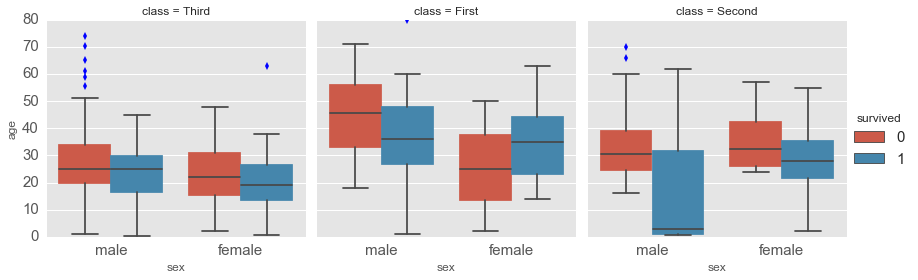

In [56]:
import seaborn as sns
sns.set_context(font_scale=4)
sns.factorplot(x='sex', y='age', hue='survived', col='class', kind='box', data=titanic)
pass

### Making plots with `pandas`

In [57]:
from pandas_datareader import data as web
import datetime

In [58]:
apple = web.DataReader('AAPL', 'google', 
                        start = datetime.datetime(2015, 1, 1),
                        end = datetime.datetime(2015, 12, 31))

In [59]:
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,111.39,111.44,107.35,109.33,53204626
2015-01-05,108.29,108.65,105.41,106.25,64285491
2015-01-06,106.54,107.43,104.63,106.26,65797116
2015-01-07,107.20,108.20,106.70,107.75,40105934
2015-01-08,109.23,112.15,108.70,111.89,59364547


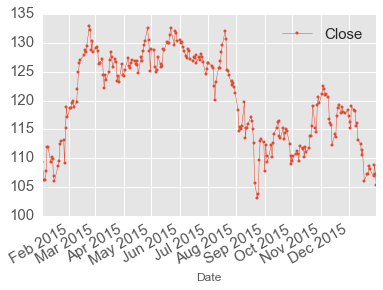

In [60]:
apple.plot.line(y='Close', marker='o', markersize=3, linewidth=0.5)
pass

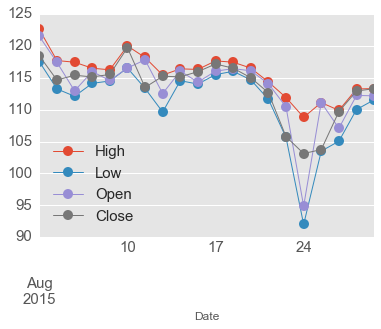

In [61]:
# Zoom in on large drop in August
aug = apple['2015-08-01':'2015-08-30']
aug.plot.line(y=['High', 'Low', 'Open', 'Close'], marker='o', markersize=10, linewidth=1)
pass

Data conversions
----

One of the nicest features of `pnadas` is the ease of convertign tabular data across differnt storage formats. We will illustrate by converting the `titanic` dataframe into multiple formats.

In [62]:
titanic.head(2)

,survived,sex,age,fare,embarked,class,who,deck,embark_town
0,0,male,22,7.2500,S,Third,man,NaN,Southampton
1,1,female,38,71.2833,C,First,woman,C,Cherbourg


#### CSV

In [63]:
titanic.to_csv('../data/titanic.csv', index=False)

In [64]:
t1 = pd.read_csv('../data/titanic.csv')
t1.head(2)

,survived,sex,age,fare,embarked,class,who,deck,embark_town
0,0,male,22,7.2500,S,Third,man,NaN,Southampton
1,1,female,38,71.2833,C,First,woman,C,Cherbourg


#### Excel

In [65]:
t1.to_excel('../data/titanic.xlsx')

In [66]:
t2 = pd.read_excel('../data/titanic.xlsx')
t2.head(2)

,survived,sex,age,fare,embarked,class,who,deck,embark_town
0,0,male,22,7.2500,S,Third,man,NaN,Southampton
1,1,female,38,71.2833,C,First,woman,C,Cherbourg


#### Relational Database

In [68]:
import sqlite3

con = sqlite3.connect('../data/titanic.db')
t2.to_sql('titanic', con, index=False, if_exists='replace')

In [69]:
t3 = pd.read_sql('select * from titanic', con)
t3.head(2)

,survived,sex,age,fare,embarked,class,who,deck,embark_town
0,0,male,22,7.2500,S,Third,man,None,Southampton
1,1,female,38,71.2833,C,First,woman,C,Cherbourg


#### JSON

In [70]:
t3.to_json('../data/titanic.json')

In [71]:
t4 = pd.read_json('../data/titanic.json')
t4.head(2)

,age,class,deck,embark_town,embarked,fare,sex,survived,who
0,22,Third,None,Southampton,S,7.2500,male,0,man
1,38,First,C,Cherbourg,C,71.2833,female,1,woman


In [72]:
t4 = t4[t3.columns]
t4.head(2)

,survived,sex,age,fare,embarked,class,who,deck,embark_town
0,0,male,22,7.2500,S,Third,man,None,Southampton
1,1,female,38,71.2833,C,First,woman,C,Cherbourg


Version information
----

In [73]:
%load_ext version_information
%version_information numpy, pandas, seaborn

Software versions
Python 3.5.1 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 4.0.1
OS Darwin 15.2.0 x86_64 i386 64bit
numpy 1.10.4
pandas 0.17.1
seaborn 0.6.0
Tue Jan 26 11:59:51 2016 EST